# Dataset Description

## Features and Explanations

| Feature                | Explanation                                                                                         | Values                                                              |
|------------------------|-----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------|
| **Diabetes_binary**    | Diabetes                                                                                           | `0` = No, `1` = Yes                                                |
| **HighBP**             | High blood pressure                                                                                | `0` = No, `1` = Yes                                                |
| **HighChol**           | High cholesterol                                                                                   | `0` = No, `1` = Yes                                                |
| **CholCheck**          | Cholesterol check in the past 5 years                                                              | `0` = No, `1` = Yes                                                |
| **BMI**                | Body Mass Index                                                                                   | Continuous values                                                  |
| **Smoker**             | Have you smoked at least 100 cigarettes in your entire life? (Note: 5 packs = 100 cigarettes)      | `0` = No, `1` = Yes                                                |
| **Stroke**             | Ever told you had a stroke?                                                                        | `0` = No, `1` = Yes                                                |
| **HeartDiseaseorAttack** | Coronary heart disease (CHD) or myocardial infarction (MI)                                       | `0` = No, `1` = Yes                                                |
| **PhysActivity**       | Physical activity in past 30 days (not including job)                                              | `0` = No, `1` = Yes                                                |
| **Fruits**             | Consume fruit 1 or more times per day                                                              | `0` = No, `1` = Yes                                                |
| **Veggies**            | Consume vegetables 1 or more times per day                                                         | `0` = No, `1` = Yes                                                |
| **HvyAlcoholConsump**  | Heavy alcohol consumption (adult men ≥14 drinks/week, adult women ≥7 drinks/week)                  | `0` = No, `1` = Yes                                                |
| **AnyHealthcare**      | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. | `0` = No, `1` = Yes                                                |
| **NoDocbcCost**        | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? | `0` = No, `1` = Yes                                                |
| **GenHlth**            | Would you say that in general your health is:                                                     | `1` = Excellent, `2` = Very Good, `3` = Good, `4` = Fair, `5` = Poor |
| **MentHlth**           | Days of poor mental health in the past 30 days                                                    | Scale: 1–30 days                                                   |
| **PhysHlth**           | Days of physical illness or injury in the past 30 days                                            | Scale: 1–30 days                                                   |
| **DiffWalk**           | Serious difficulty walking or climbing stairs                                                     | `0` = No, `1` = Yes                                                |
| **Sex**                | Gender                                                                                            | `0` = Female, `1` = Male                                           |
| **Age**                | 13-level age category (_AGEG5YR see codebook)                                                     | `1` = 18-24, `9` = 60-64, `13` = 80 or older                       |
| **Education**          | Education level (EDUCA see codebook)                                                              | Scale: `1` = Never attended school, `2` = Elementary, ...          |
| **Income**             | Income scale (INCOME2 see codebook)                                                               | Scale: `1` = Less than $10,000, ..., `5` = Less than $35,000, `8` = $75,000 or more |


In [2]:
# Basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix


# Import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from keras.constraints import max_norm
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from random import randint
from tensorflow.keras.utils import to_categorical



from scipy import stats

In [4]:
df = pd.read_csv('diabetes_binary_health_indicators.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [16]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [18]:
#Checking for duplicated 
df.duplicated().sum()

24206

In [20]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(229474, 22)

In [22]:
df.duplicated().sum()

0

In [24]:
#Change dtype to int
df = df.astype('int32')

<Axes: >

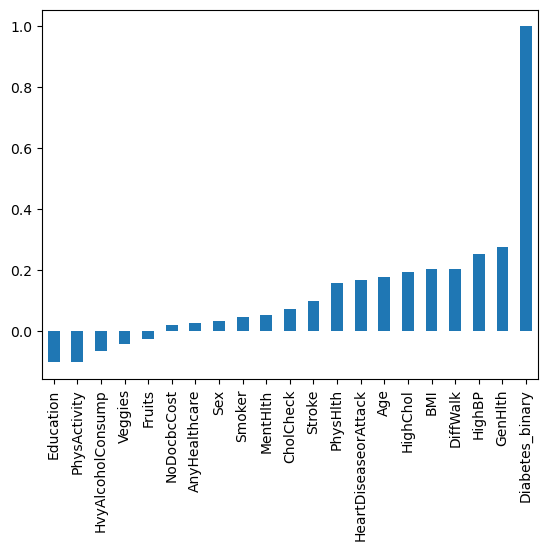

In [26]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['Diabetes_binary'][:-1].sort_values().plot(kind='bar')

Text(0.5, 1.0, 'Correlation Heatmap')

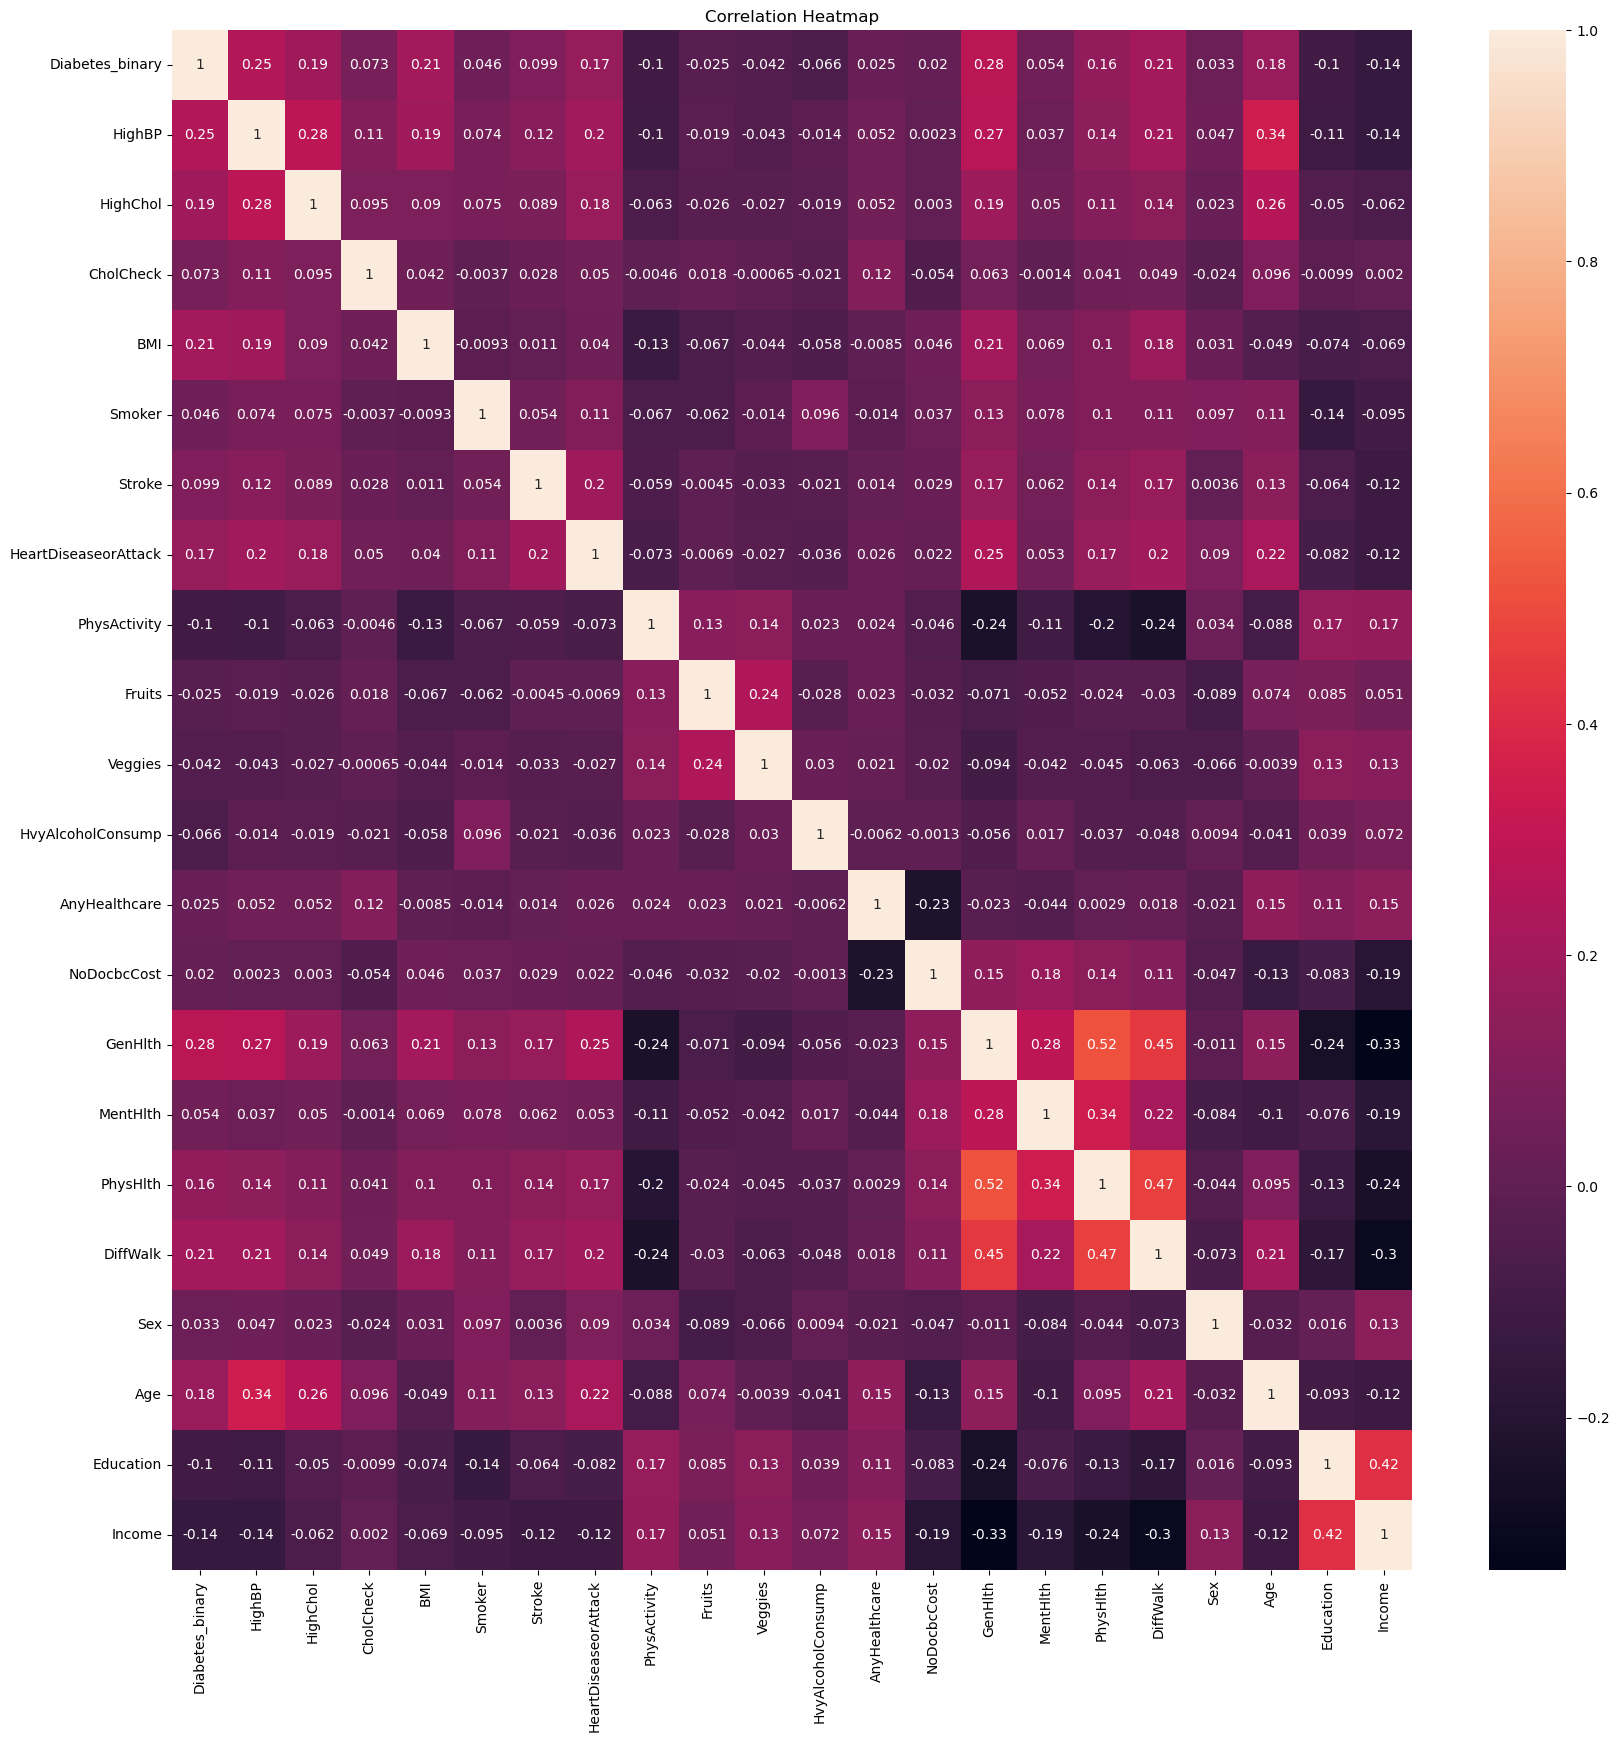

In [31]:
#correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes_binary', axis=1), df['Diabetes_binary'], test_size=0.2, random_state=42)

# Model training

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(true, predicted, prob_predicted=None):
    """
    Evaluate a classification model.

    Parameters:
        true (array-like): True labels.
        predicted (array-like): Predicted labels.
        prob_predicted (array-like, optional): Predicted probabilities for positive class (required for ROC AUC).

    Returns:
        tuple: Accuracy, Precision, Recall, F1-score, and ROC AUC (if prob_predicted is provided).
    """
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    
    # Calculate ROC AUC if predicted probabilities are provided
    roc_auc = roc_auc_score(true, prob_predicted) if prob_predicted is not None else None
    
    return accuracy, precision, recall, f1, roc_auc


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}
model_list = []
r2_list =[]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'models' dictionary and train/test splits are already defined
model_list = []
roc_auc_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Check if model supports predict_proba (for ROC AUC calculation)
    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_train_prob = y_test_prob = None
    
    # Evaluate Train and Test dataset
    train_metrics = evaluate_model(y_train, y_train_pred, prob_predicted=y_train_prob)
    test_metrics = evaluate_model(y_test, y_test_pred, prob_predicted=y_test_prob)

    # Unpack metrics
    train_accuracy, train_precision, train_recall, train_f1, train_roc_auc = train_metrics
    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc = test_metrics

    # Print metrics
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set:')
    print("- Accuracy: {:.4f}".format(train_accuracy))
    print("- Precision: {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))
    print("- F1 Score: {:.4f}".format(train_f1))
    if train_roc_auc is not None:
        print("- ROC AUC: {:.4f}".format(train_roc_auc))

    print('----------------------------------')
    
    print('Model performance for Test set:')
    print("- Accuracy: {:.4f}".format(test_accuracy))
    print("- Precision: {:.4f}".format(test_precision))
    print("- Recall: {:.4f}".format(test_recall))
    print("- F1 Score: {:.4f}".format(test_f1))
    if test_roc_auc is not None:
        print("- ROC AUC: {:.4f}".format(test_roc_auc))
        roc_auc_list.append(test_roc_auc)

    print('=' * 35)
    print('\n')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set:
- Accuracy: 0.8485
- Precision: 0.5141
- Recall: 0.1309
- F1 Score: 0.2087
- ROC AUC: 0.7912
----------------------------------
Model performance for Test set:
- Accuracy: 0.8474
- Precision: 0.5215
- Recall: 0.1353
- F1 Score: 0.2148
- ROC AUC: 0.7942


Decision Tree
Model performance for Training set:
- Accuracy: 0.9946
- Precision: 1.0000
- Recall: 0.9648
- F1 Score: 0.9821
- ROC AUC: 0.9999
----------------------------------
Model performance for Test set:
- Accuracy: 0.7730
- Precision: 0.2881
- Recall: 0.3200
- F1 Score: 0.3032
- ROC AUC: 0.5887


Random Forest Classifier
Model performance for Training set:
- Accuracy: 0.9946
- Precision: 0.9945
- Recall: 0.9701
- F1 Score: 0.9821
- ROC AUC: 0.9999
----------------------------------
Model performance for Test set:
- Accuracy: 0.8421
- Precision: 0.4673
- Recall: 0.1666
- F1 Score: 0.2457
- ROC AUC: 0.7754




C:\Users\Yasin Ahmed\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:25:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier
Model performance for Training set:
- Accuracy: 0.8652
- Precision: 0.6837
- Recall: 0.2177
- F1 Score: 0.3302
- ROC AUC: 0.8464
----------------------------------
Model performance for Test set:
- Accuracy: 0.8503
- Precision: 0.5483
- Recall: 0.1690
- F1 Score: 0.2584
- ROC AUC: 0.8118


CatBoost Classifier
Model performance for Training set:
- Accuracy: 0.8682
- Precision: 0.7163
- Recall: 0.2263
- F1 Score: 0.3439
- ROC AUC: 0.8458
----------------------------------
Model performance for Test set:
- Accuracy: 0.8513
- Precision: 0.5614
- Recall: 0.1672
- F1 Score: 0.2576
- ROC AUC: 0.8144


AdaBoost Classifier
Model performance for Training set:
- Accuracy: 0.8527
- Precision: 0.5540
- Recall: 0.1784
- F1 Score: 0.2699
- ROC AUC: 0.8124
----------------------------------
Model performance for Test set:
- Accuracy: 0.8510
- Precision: 0.5536
- Recall: 0.1778
- F1 Score: 0.2691
- ROC AUC: 0.8127


